In [1]:
import pandas as pd
import numpy as np
import math
import scipy.interpolate
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
# using laTeX fonts
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': [r'\usepackage{amsmath}']})

In [3]:
! pwd

/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22


In [4]:
# generating {mu, sigma, alpha, beta} grid
 
# used to generate mu:
-1 * np.logspace(math.log(abs(-0.05), math.e), math.log(abs(-0.00001), math.e), num=30, endpoint=True, base=math.e);
# used to generate sigma:
np.logspace(math.log(0.00001, math.e), math.log(0.05, math.e), num=30, endpoint=True, base=math.e);

mu = [-0.0500000000000000, -0.0372751426827093, -0.0277887252403267, -0.0207165739660756, -0.0154442650096474, -0.0115137436372836, -0.0085835287378376, -0.0063990451684807, -0.0047705064337644, -0.0035564261597470, -0.0026513258509018, -0.0019765709878144, -0.0014735393118657, -0.0010985277619675, -0.0008189555813651, -0.0006105337229237, -0.0004551546326917, -0.0003393190775256, -0.0002529633405947, -0.0001885848922832, -0.0001405905753532, -0.0001048106751227, -0.0000781366573974, -0.0000582511010648, -0.0000434263620723, -0.0000323744768487, -0.0000241352648763, -0.0000179929088390, -0.0000134137648850, -0.0000100000000000]
sigma = [0.0000100000000000, 0.0000134137648850, 0.0000179929088390, 0.0000241352648763, 0.0000323744768487, 0.0000434263620723, 0.0000582511010648, 0.0000781366573974, 0.0001048106751227, 0.0001405905753532, 0.0001885848922832, 0.0002529633405947, 0.0003393190775256, 0.0004551546326917, 0.0006105337229237, 0.0008189555813651, 0.0010985277619675, 0.0014735393118657, 0.0019765709878144, 0.0026513258509018, 0.0035564261597470, 0.0047705064337644, 0.0063990451684807, 0.0085835287378376, 0.0115137436372836, 0.0154442650096474, 0.0207165739660756, 0.0277887252403267, 0.0372751426827093, 0.0500000000000000]
alpha = [0, -2, -4]
beta = [0, 1000, 3000, 5000, 7000]

mu_sigma = [[x, y] for x in mu for y in sigma]
alpha_beta = [[x, y] for x in alpha for y in beta]

In [5]:
# used area.nb to compute how much of the probability density of the distribution of fitness effects is above zero; reading the output
# rounding is important! doing up to 4 digits here

dfe_area_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=0.csv", header=None)
dfe_area_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0.values.tolist() for item in sublist]
dfe_area_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 4) for sublist in dfe_area_0.values.tolist() for item in sublist]
dfe_area_0_dict = dict(zip(dfe_area_0_keys, dfe_area_0_values))

dfe_area_2 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-2.csv", header=None)
dfe_area_2_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2.values.tolist() for item in sublist]
dfe_area_2_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 4) for sublist in dfe_area_2.values.tolist() for item in sublist]
dfe_area_2_dict = dict(zip(dfe_area_2_keys, dfe_area_2_values))

dfe_area_4 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-4.csv", header=None)
dfe_area_4_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_4.values.tolist() for item in sublist]
dfe_area_4_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 4) for sublist in dfe_area_4.values.tolist() for item in sublist]
dfe_area_4_dict = dict(zip(dfe_area_4_keys, dfe_area_4_values))


mu_sigma_area_0 = [[i, j, dfe_area_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2 = [[i, j, dfe_area_2_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]
mu_sigma_area_4 = [[i, j, dfe_area_4_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -4')] for i in mu for j in sigma]

In [6]:
to_use = []
for alpha_area in [(mu_sigma_area_0, 0), (mu_sigma_area_2, -2), (mu_sigma_area_4, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] > 0.0 and ((alpha_area[0][i - 1][-1] == 0 and alpha_area[0][i][0] == alpha_area[0][i - 1][0]) or (alpha_area[0][i - 1][-1] != 0 and alpha_area[0][i][0] != alpha_area[0][i - 1][0])): # choosing points at the border
            mu_i = alpha_area[0][i][0]
            for j in range(-3, 26): # adding three points below the treshold + as many as I can fit up to 5% positive
                if alpha_area[0][i + j][0] == mu_i and alpha_area[0][i + j][-1] <= 0.05: # checking that we are in the same column and requiring less than 5% to be positive
                    if alpha_area[0][i + j][0] > -0.015 and alpha_area[0][i + j][1] < 0.015: # introducing mu and sigma cut-offs
                        to_use.append([alpha_area[0][i + j][0], alpha_area[0][i + j][1], alpha_area[1], alpha_area[0][i + j][2]])

In [7]:
to_use_rai = []
for alpha_area in [(mu_sigma_area_0, 0), (mu_sigma_area_2, -2), (mu_sigma_area_4, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] <= 0.000:
            if alpha_area[0][i][0] > -0.015 and alpha_area[0][i][1] < 0.015: # introducing mu and sigma cut-offs
                to_use_rai.append([alpha_area[0][i][0], alpha_area[0][i][1], alpha_area[1], alpha_area[0][i][2]])

In [8]:
# saving points to use with Rai's results
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_rai.txt', 'w+') as o:
#     o.writelines(['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' + '{:.1f}'.format(x[2]) + '\n' for x in to_use_rai])

In [9]:
# saving points to use with Fedya's results
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_fedya.txt', 'w+') as o:
#     o.writelines(['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' + '{:.1f}'.format(x[2]) + '\n' for x in to_use if x not in to_use_rai])

In [10]:
with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_fedya.txt') as f:
    points_fedya = [[float(y) for y in x.split()] for x in f.readlines()]

In [11]:
with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_rai.txt') as f:
    points_rai = [[float(y) for y in x.split()] for x in f.readlines()]

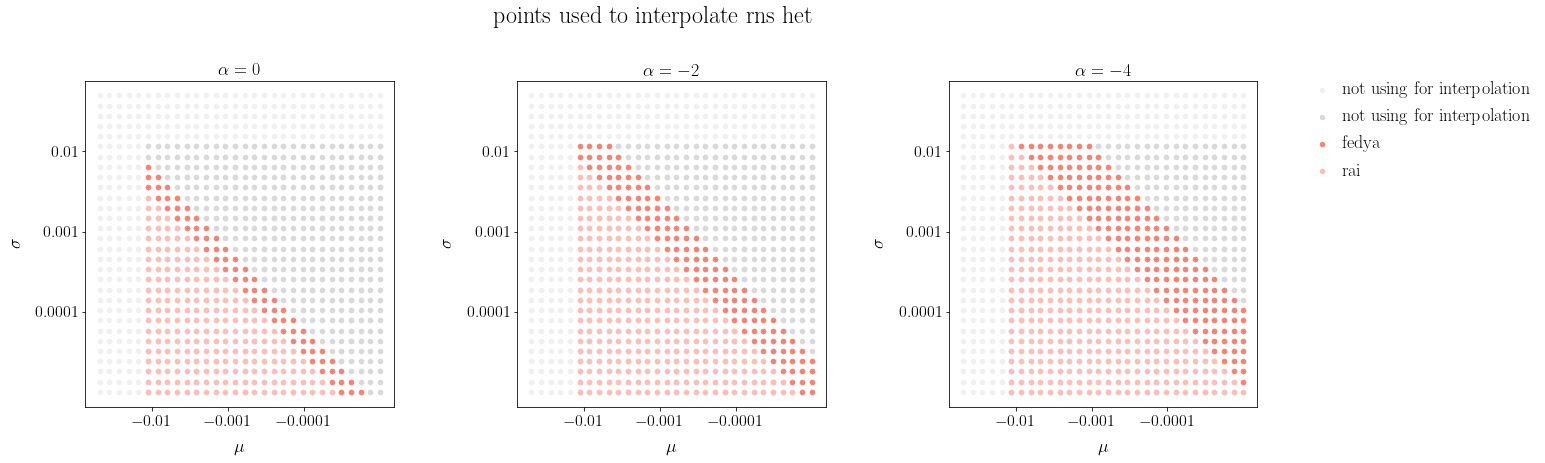

In [13]:
plt.figure(figsize=(21, 6))

grid = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[1, 1, 1], wspace=0.4)

plt.subplot(grid[0, 0])
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma], [np.log(y[1]) for y in mu_sigma], s=20, c='#f0f0f0') # all points
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma if abs(x[0]) < 0.014], [np.log(y[1]) for y in mu_sigma if abs(y[1]) < 0.014], s=20, c='#d9d9d9') # points that we decided to leave
plt.scatter([-np.log(abs(x[0])) for x in points_fedya if x[-1] == 0.0], [np.log(y[1]) for y in points_fedya if y[-1] == 0.0], s=20, c='#fa8072') # points for which we will use fedya's results
plt.scatter([-np.log(abs(x[0])) for x in points_rai if x[-1] == 0.0], [np.log(y[1]) for y in points_rai if y[-1] == 0.0], s=20, c='#ffbdb5') # points for which we will use rai's results

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=0$', fontsize=18)


plt.subplot(grid[0, 1])
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma], [np.log(y[1]) for y in mu_sigma], s=20, c='#f0f0f0') # all points
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma if abs(x[0]) < 0.014], [np.log(y[1]) for y in mu_sigma if abs(y[1]) < 0.014], s=20, c='#d9d9d9') # points that we decided to leave
plt.scatter([-np.log(abs(x[0])) for x in points_fedya if x[-1] == -2.0], [np.log(y[1]) for y in points_fedya if y[-1] == -2.0], s=20, c='#fa8072') # points for which we will use fedya's results
plt.scatter([-np.log(abs(x[0])) for x in points_rai if x[-1] == -2.0], [np.log(y[1]) for y in points_rai if y[-1] == -2.0], s=20, c='#ffbdb5') # points for which we will use rai's results

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=-2$', fontsize=18)


plt.subplot(grid[0, 2])
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma], [np.log(y[1]) for y in mu_sigma], s=20, c='#f0f0f0', label=r'$\textrm{not using for interpolation}$') # all points
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma if abs(x[0]) < 0.014], [np.log(y[1]) for y in mu_sigma if abs(y[1]) < 0.014], s=20, c='#d9d9d9', label=r'$\textrm{not using for interpolation}$') # points that we decided to leave
plt.scatter([-np.log(abs(x[0])) for x in points_fedya if x[-1] == -4.0], [np.log(y[1]) for y in points_fedya if y[-1] == -4.0], s=20, c='#fa8072', label=r'$\textrm{fedya}$') # points for which we will use fedya's results
plt.scatter([-np.log(abs(x[0])) for x in points_rai if x[-1] == -4.0], [np.log(y[1]) for y in points_rai if y[-1] == -4.0], s=20, c='#ffbdb5', label=r'$\textrm{rai}$') # points for which we will use rai's results

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=-4$', fontsize=18)

plt.legend(frameon=False, prop={'size':18}, handletextpad=0.1, bbox_to_anchor=(1.1, 1.05))

plt.suptitle(r'$\textrm{points used to interpolate rns het}$', fontsize=24, y=1.05);

# plt.savefig('points-to-use-for-rns-het.png', dpi=300, bbox_inches='tight')

In [14]:
which_points_dict = dict(zip(['{:.10f}'.format(j[0]) + ' ' + '{:.10f}'.format(j[1]) + ' ' + '{:.1f}'.format(j[2]) for j in points_rai]
                             + ['{:.10f}'.format(j[0]) + ' ' + '{:.10f}'.format(j[1]) + ' ' + '{:.1f}'.format(j[2]) for j in points_fedya],
                             ['rai' for i in range(len(points_rai))] + ['fedya' for i in range(len(points_rai))]))

In [15]:
# using Rai's numbers from ver14 (see email dated Jan 21, 2021)
rns_pd = pd.read_excel("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver14/Rai's/Expected polymorphisms.xlsx", sheet_name="Last stint")

rns_het_rai = ['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' 
               + '{:.1f}'.format(x[2]) + ' ' + '{:.0f}'.format(x[3]) + ' ' 
               + '{:.12f}'.format(x[4]) for x in rns_pd.values.tolist()]

rns_het_rai_dict = dict(zip([' '.join(x.split()[:-1]) for x in rns_het_rai], 
                            [x.split()[-1] for x in rns_het_rai]))


In [16]:
# reading parsed out from Fedya's code
with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/pos/rns-hets-points_rns_avg-het.txt') as f:
    rns_het_fedya = [x.strip('\n').replace('mu ', '').replace('sigma ', '').replace('alpha ', '').replace('beta ', '').replace('het ', '') for x in f.readlines()]

rns_het_fedya_dict = dict(zip([' '.join(x.split()[:-1]) for x in rns_het_fedya], 
                              [x.split()[-1] for x in rns_het_fedya]))

In [17]:
rns_het = [] # concatenated Rai's and Fedya's het results
rns_het_whose = ['mu sigma alpha beta het how'] 

for i in mu_sigma:
    for j in alpha:
        k = '{:.10f}'.format(i[0]) + ' ' + '{:.10f}'.format(i[1]) + ' ' + '{:.1f}'.format(j)
        if which_points_dict.get(k) == 'fedya':
            for b in beta:
                rns_het.append(k + ' ' + '{:.0f}'.format(b) + ' ' + rns_het_fedya_dict.get(k + ' ' + '{:.0f}'.format(b)))
                rns_het_whose.append(k + ' ' + '{:.0f}'.format(b) + ' ' + rns_het_fedya_dict.get(k + ' ' + '{:.0f}'.format(b)) + ' fedya')
        elif which_points_dict.get(k) == 'rai':
            for b in beta:
                rns_het.append(k + ' ' + '{:.0f}'.format(b) + ' ' + rns_het_rai_dict.get(k + ' ' + '{:.0f}'.format(b)))
                rns_het_whose.append(k + ' ' + '{:.0f}'.format(b) + ' ' + rns_het_rai_dict.get(k + ' ' + '{:.0f}'.format(b)) + ' rai')
                
# saving it:
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het.txt', 'w+') as o:
#     o.writelines([x + '\n' for x in rns_het])
    
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_which.txt', 'w+') as o:
#     o.writelines([x + '\n' for x in rns_het_whose])

In [60]:
rns_het_mateusz = 0.00091

In [62]:
rns_het_alpha_beta = [] # list of [mu, sigma, alpha, beta, rns het] for alpha, beta values
rns_het_alpha_beta_err = [] # same as above, but only with points with less than 0.1 relative error
for j in alpha_beta:
    rns_het_j = []
    rns_het_j_err = []
    for i in rns_het:
        if '{:.1f}'.format(j[0]) + ' ' + '{:.0f}'.format(j[1]) in i:
            rns_het_j.append(i)
            if abs(float(i.split()[-1]) - rns_het_mateusz) / rns_het_mateusz <= 0.1:
                rns_het_j_err.append(i)
    rns_het_alpha_beta.append(rns_het_j)
    rns_het_alpha_beta_err.append(rns_het_j_err)

In [49]:
interpolation = scipy.interpolate.LinearNDInterpolator([(-np.log(abs(float(x.split()[0]))), np.log(float(x.split()[1]))) for x in rns_het_alpha_beta[0]], [float(x.split()[-1]) for x in rns_het_alpha_beta[0]])
x = np.linspace(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
y = np.linspace(np.log(abs(0.00001)), np.log(abs(0.01)))
x, y = np.meshgrid(x, y)
z = interpolation(x, y)

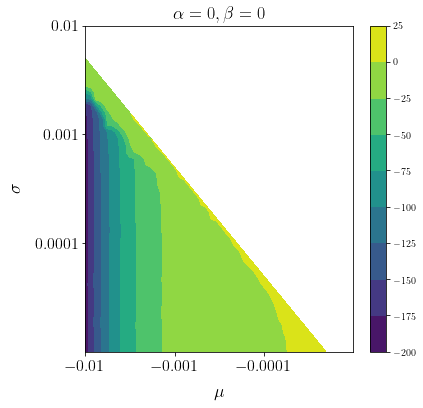

In [53]:
plt.figure(figsize=(6, 6))
# plt.pcolormesh(x, y, z - 0.000911)
# plt.contourf(x, y, z - 0.000911)
plt.contourf(x, y, (z - 0.000911) / z)
#plt.plot([-np.log(abs(float(x.split()[0]))) for x in rns_het_alpha_beta[0]], [np.log(float(x.split()[1])) for x in rns_het_alpha_beta[0]], 'ok')

plt.colorbar()
plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=0, \beta=0$', fontsize=18);

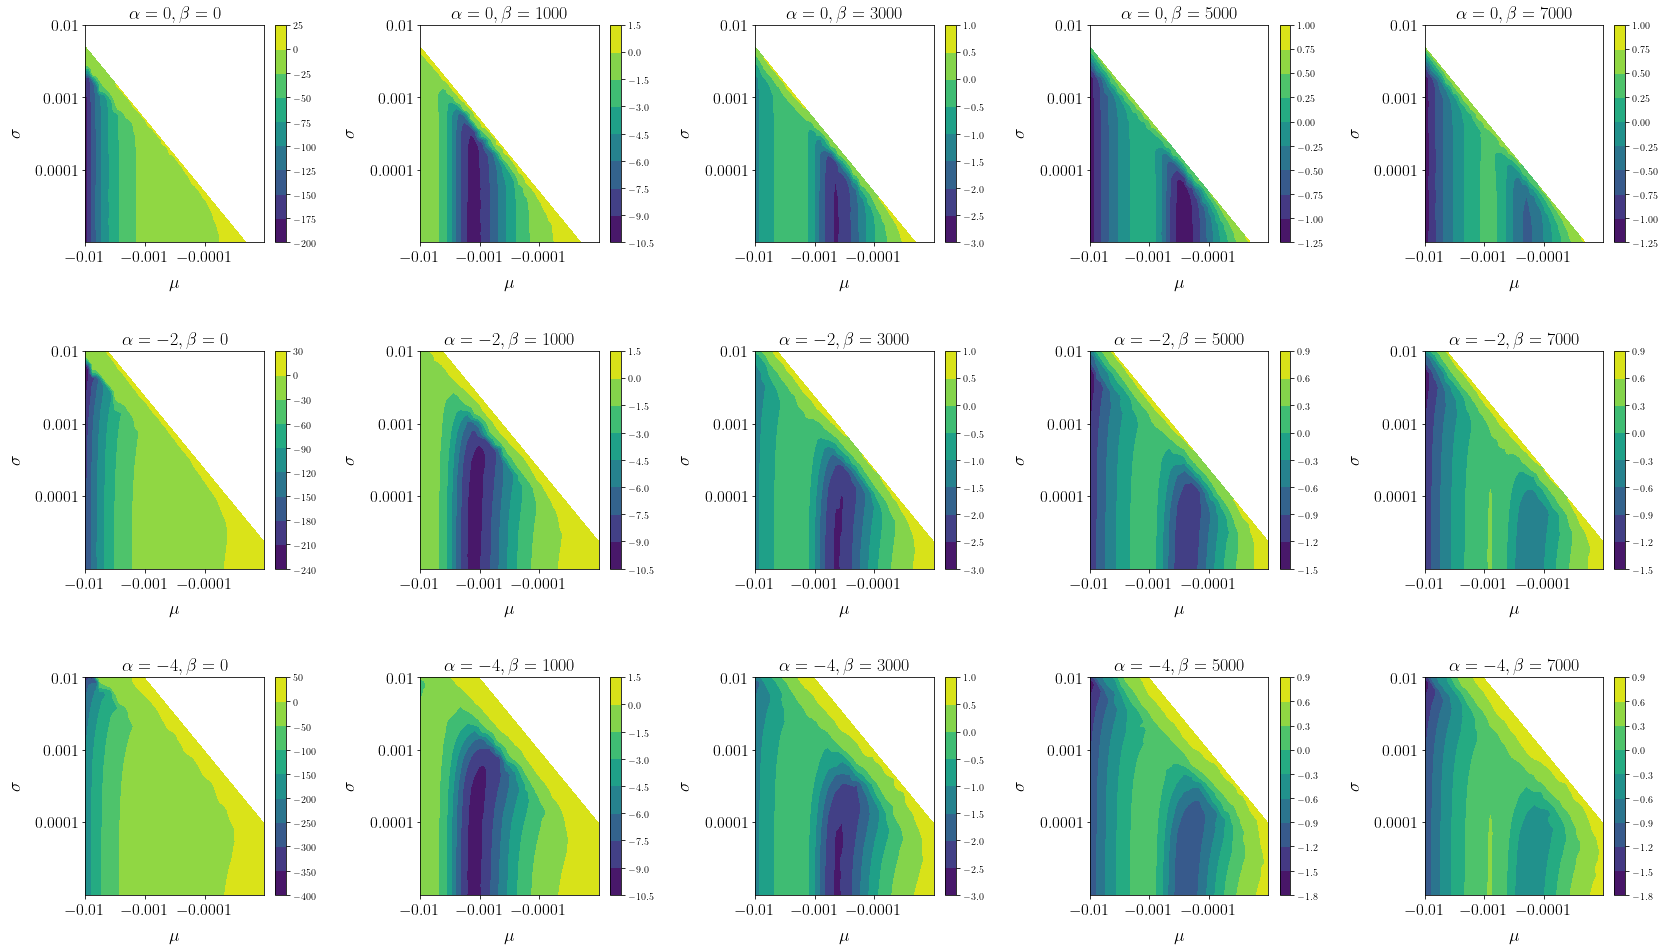

In [44]:
plt.figure(figsize=(28, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):

    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    interpolation = scipy.interpolate.LinearNDInterpolator([(-np.log(abs(float(x.split()[0]))), np.log(float(x.split()[1]))) for x in rns_het_alpha_beta[i]], [float(x.split()[-1]) for x in rns_het_alpha_beta[i]])
    x = np.linspace(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    y = np.linspace(np.log(abs(0.00001)), np.log(abs(0.01)))
    x, y = np.meshgrid(x, y)
    z = interpolation(x, y)

    # plt.contourf(x, y, (z - 0.000911) / z, levels = [-0.01, 0.01])
    plt.contourf(x, y, (z - 0.000911) / z)

    plt.colorbar()
    
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
# plt.savefig('rns-het-err=0.png', dpi=300, bbox_inches='tight')

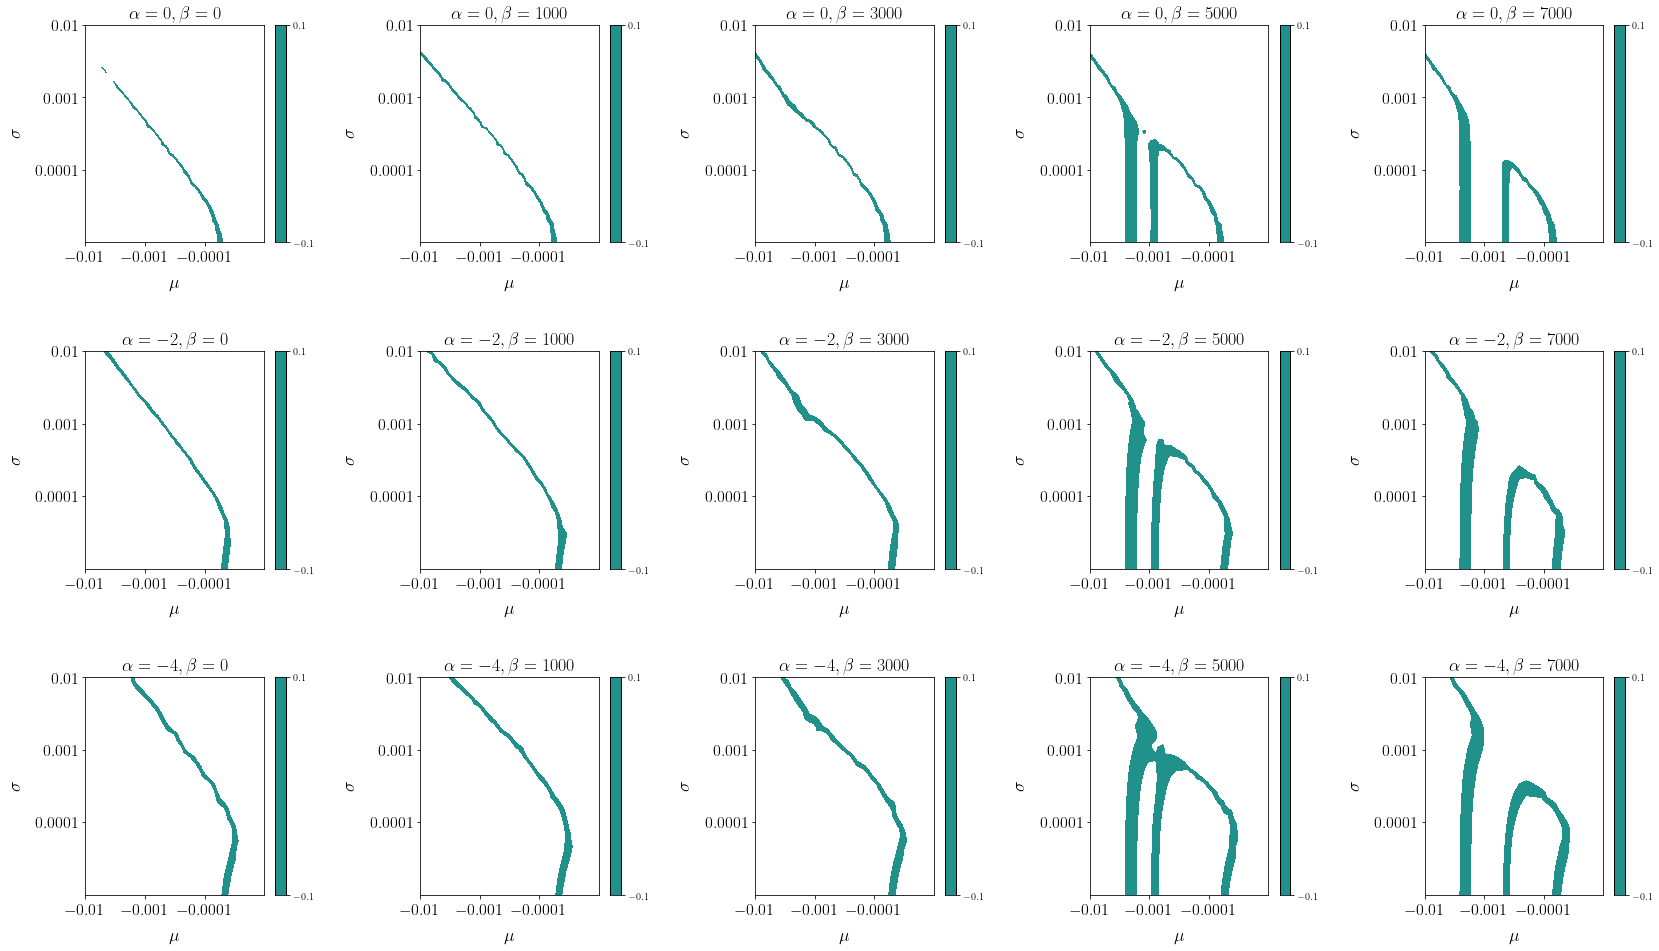

In [64]:
plt.figure(figsize=(28, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):

    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    interpolation = scipy.interpolate.LinearNDInterpolator([(-np.log(abs(float(x.split()[0]))), np.log(float(x.split()[1]))) for x in rns_het_alpha_beta[i]], [float(x.split()[-1]) for x in rns_het_alpha_beta[i]])
    x = np.linspace(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    y = np.linspace(np.log(abs(0.00001)), np.log(abs(0.01)))
    x, y = np.meshgrid(x, y)
    z = interpolation(x, y)

    plt.contourf(x, y, (z - 0.000911) / z, levels = [-0.1, 0.1])
    # plt.contourf(x, y, (z - 0.000911) / z)

    plt.colorbar()
    
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
# plt.savefig('rns-het-err=0.png', dpi=300, bbox_inches='tight')

In [ ]:
# Griffin: plot scatter plots w/ the same colors to check

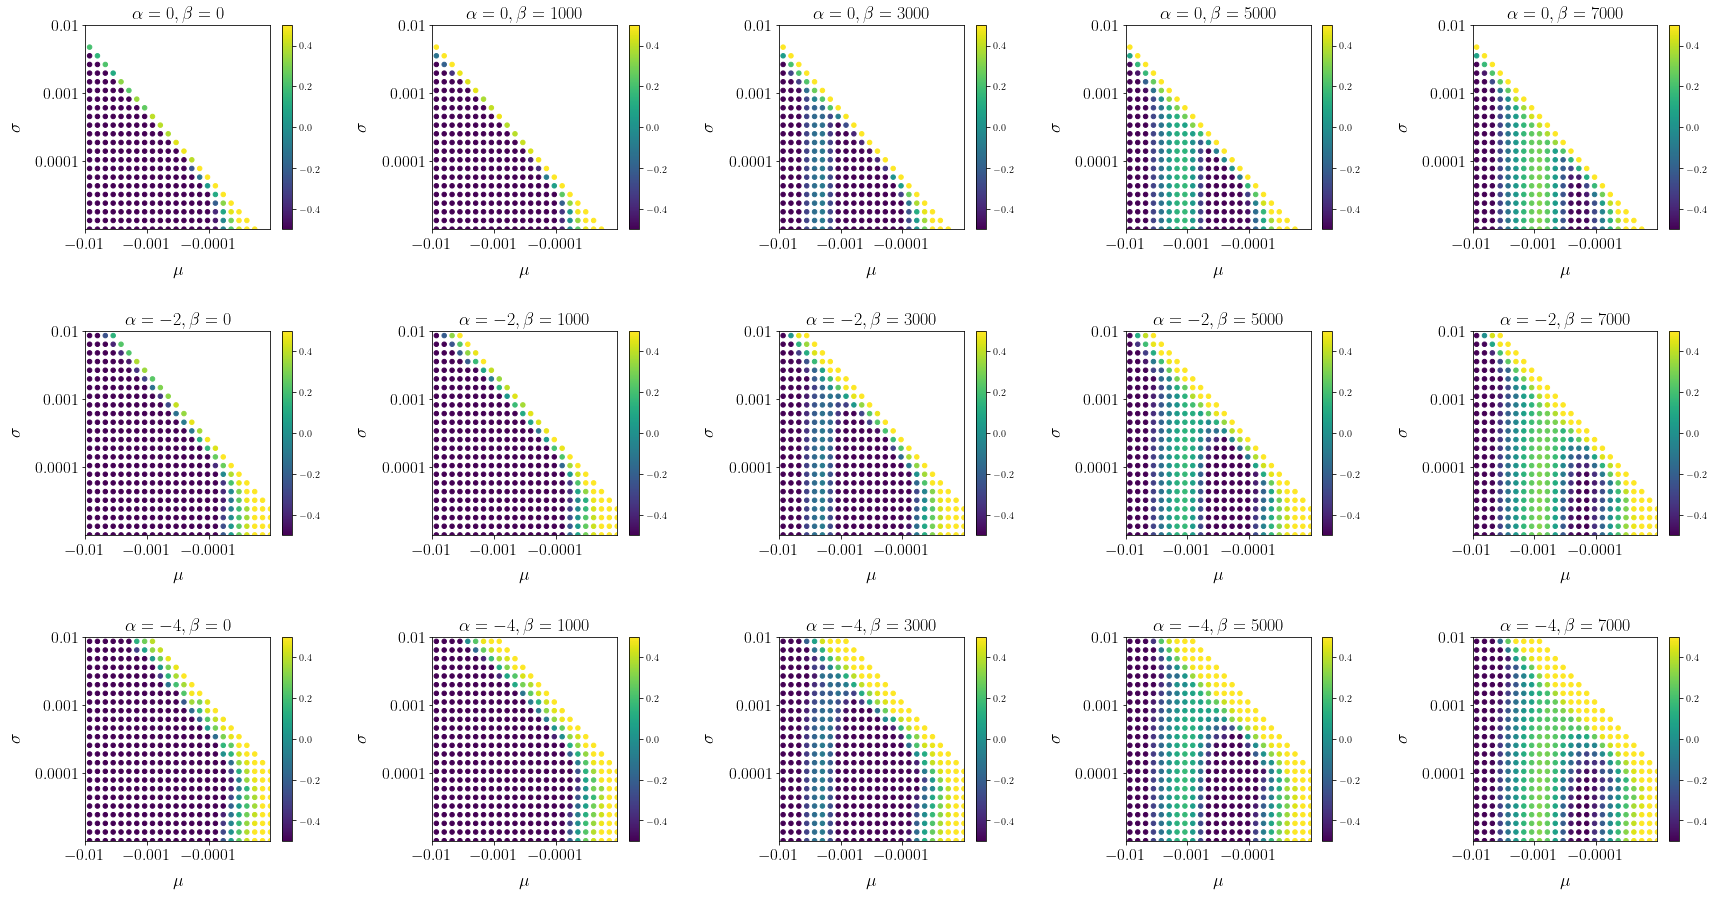

In [46]:
plt.figure(figsize=(29, 15))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])

    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in rns_het_alpha_beta[i]], [np.log(float(x.split()[1])) for x in rns_het_alpha_beta[i]], c=[(float(x.split()[-1]) - 0.000911) / float(x.split()[-1]) for x in rns_het_alpha_beta[i]], norm = matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5), s=20)
    
    plt.colorbar()
    
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
# plt.savefig('rns-het-err.png', dpi=300, bbox_inches='tight')

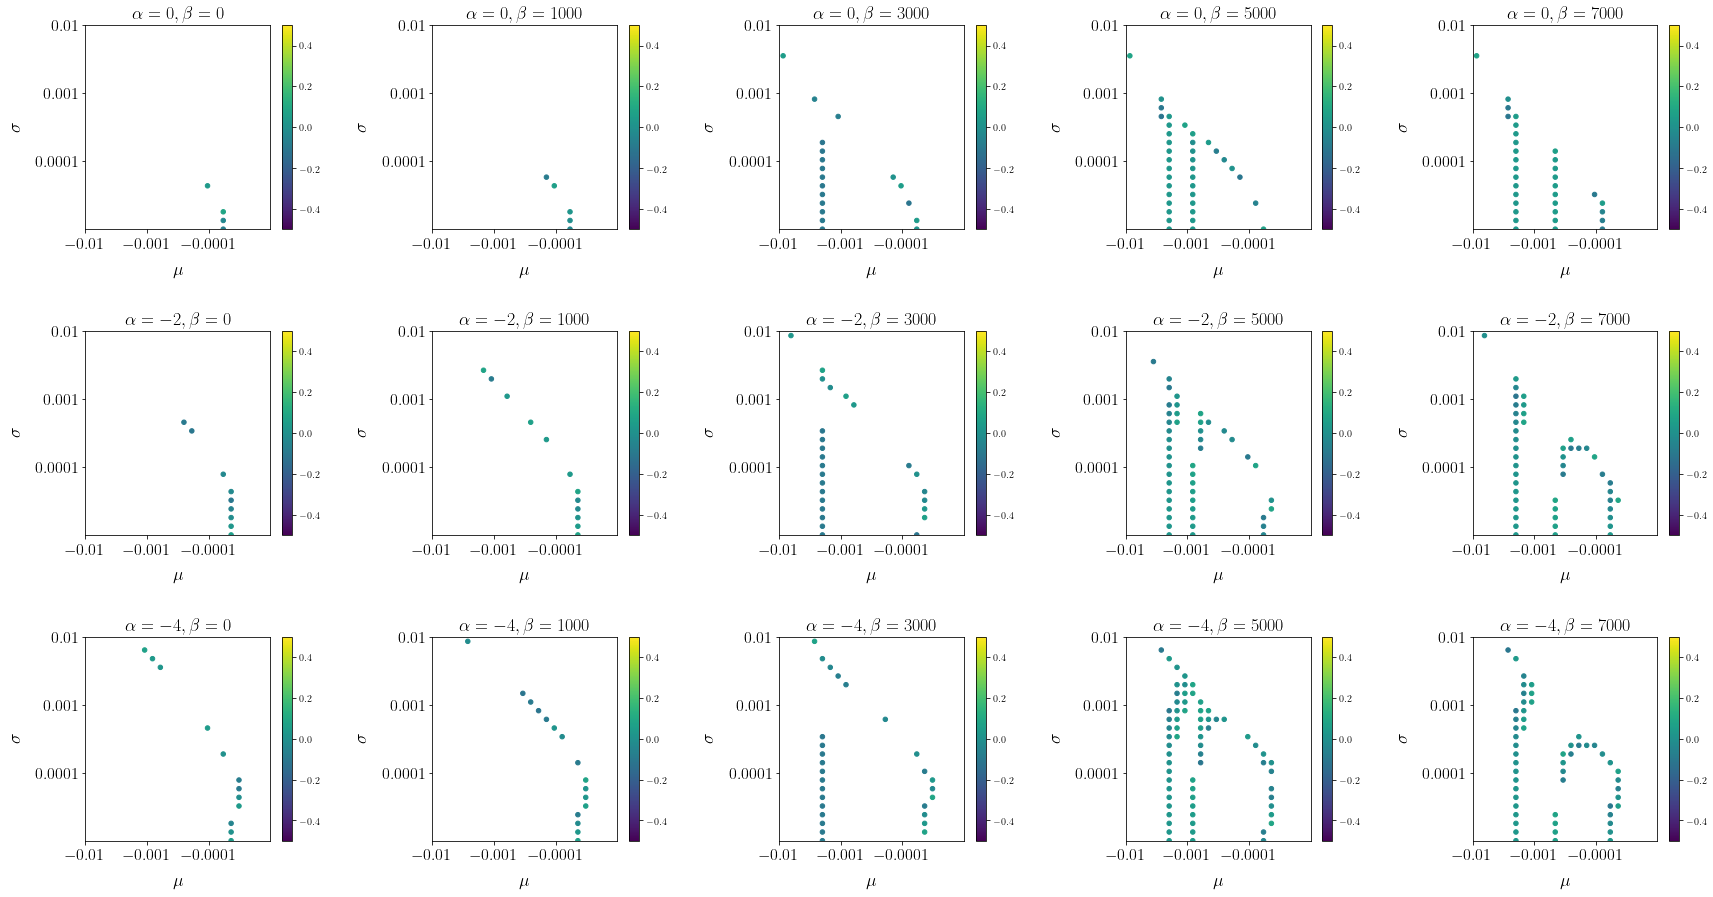

In [63]:
plt.figure(figsize=(29, 15))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])

    plt.scatter([-np.log(abs(float(x.split()[0]))) for x in rns_het_alpha_beta_err[i]], [np.log(float(x.split()[1])) for x in rns_het_alpha_beta_err[i]], c=[(float(x.split()[-1]) - 0.000911) / float(x.split()[-1]) for x in rns_het_alpha_beta_err[i]], norm = matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5), s=20)
    
    plt.colorbar()
    
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
# plt.savefig('rns-het-err.png', dpi=300, bbox_inches='tight')